# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Helper function to calculate prediction interval:](#Helper-function-to-calculate-prediction-interval:)

III. [Models:](#Models:)

* [Linear Regression:](#Linear-Regression:)

* [Ridge Regression:](#Ridge-Regression:-(L2-Regularization))

* [Lasso Regression:](#Lasso-Regression:-(L1-Regularization))

* [Ensemble:](#Ensemble:)



## Loading the Data:

([Contents:](#Contents:))

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/News-Articles-Share-Prediction-project-main/Data/modified_file.csv')

data.head(10)
data.shape
data.head(1)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month,day_of_week
0,15.76346,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.495194,1.791759,1.386294,0.693147,1.719116,5,Business,1459.5,8.480258,8.123088,7.514436,0.339156,0.03803,0.036076,0.024195,0.25,0.223144,7.378384,3,0


In [4]:
df = data.copy()

In [5]:
df['article_length'] = df['text'].apply(len)

df['published_day'] = pd.to_datetime(df['published_date']).dt.day_name()


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'article_length']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [7]:

# Dropping 'title' and 'text' columns
df = df.drop(['title', 'text', 'data_channel'], axis=1)

# Splitting the dataset into features and target variable
X = df.drop('shares', axis=1)
y = df['shares']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

x_train['published_date'] = pd.to_datetime(x_train['published_date'])
x_test['published_date'] = pd.to_datetime(x_test['published_date'])
x_train['day_of_week'] = x_train['published_date'].dt.dayofweek
x_train['quarter'] = x_train['published_date'].dt.quarter
x_test['day_of_week'] = x_test['published_date'].dt.dayofweek
x_test['quarter'] = x_test['published_date'].dt.quarter


In [9]:
non_numeric_columns = x_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)



Non-numeric columns: Index(['published_date', 'published_day'], dtype='object')


In [10]:

x_train = x_train.drop(non_numeric_columns, axis=1)
x_test = x_test.drop(non_numeric_columns, axis=1)

In [11]:
import numpy as np

print("Infinity values in x_train:", np.any(np.isinf(x_train)))
print("Large values in x_train:", np.any(np.abs(x_train) > 1e15))

print("Infinity values in y_train:", np.any(np.isinf(y_train)))
print("Large values in y_train:", np.any(np.abs(y_train) > 1e15))

Infinity values in x_train: True
Large values in x_train: True
Infinity values in y_train: False
Large values in y_train: False


In [12]:

# Replace large values with a reasonable value
x_train[np.abs(x_train) > 1e15] = np.nan
x_train = np.nan_to_num(x_train)


In [13]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)


In [14]:


# Replace large values with a reasonable value
x_test[np.abs(x_test) > 1e15] = np.nan
x_test = np.nan_to_num(x_test)


In [15]:
# x_test_scaled = scaler.transform(x_test)


## Models:

### Linear Regression:

([Contents:](#Contents:))

In [16]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.09305806748905765


In [17]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: 0.08369447630171745
Test MAE: 0.6968432870063218
Test RMSE: 0.9256963525209916


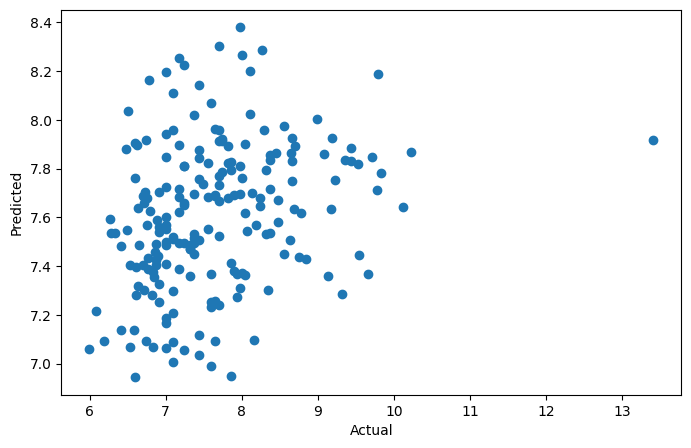

In [18]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Ridge Regression: (L2 Regularization)

([Contents:](#Contents:))

In [19]:
# Model training
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.08259447343670878


In [20]:
# Predicting on the test and evaluating the accuracy
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: 0.07970335330920986
Test MAE: 0.704139170770606
Test RMSE: 0.9277101751820747


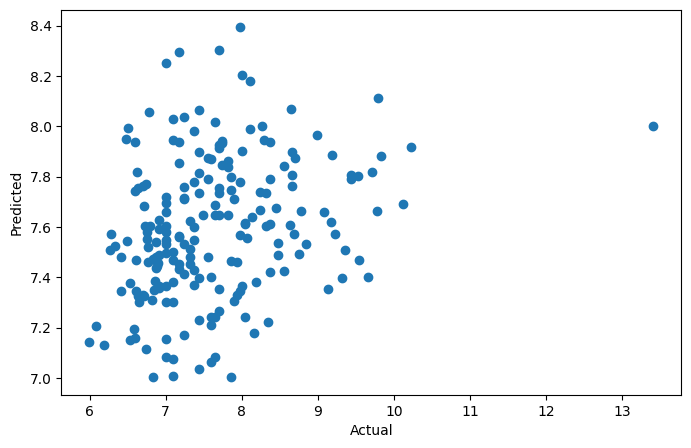

In [21]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Lasso Regression: (L1 Regularization)

([Contents:](#Contents:))

In [22]:
# Model training
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 3.3318618101074726e-05


In [23]:
# Predicting on the test and evaluating the accuracy
preds_las = las.predict(x_test).reshape(-1,1)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: -0.005245239629984244
Test MAE: 0.7260416227218458
Test RMSE: 0.9695817062755142


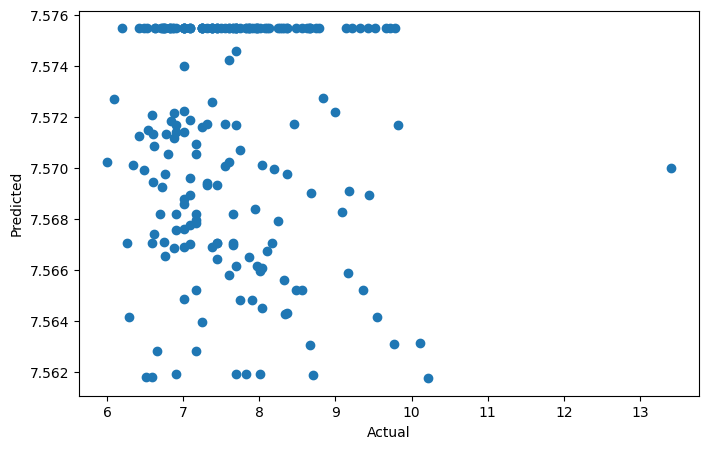

In [24]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_las)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Ensemble:

([Contents:](#Contents:))

In [25]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.07870043534210336


In [26]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.07411840696014815
Test MAE: 0.6984467944343006
Test RMSE: 0.9305208855183513


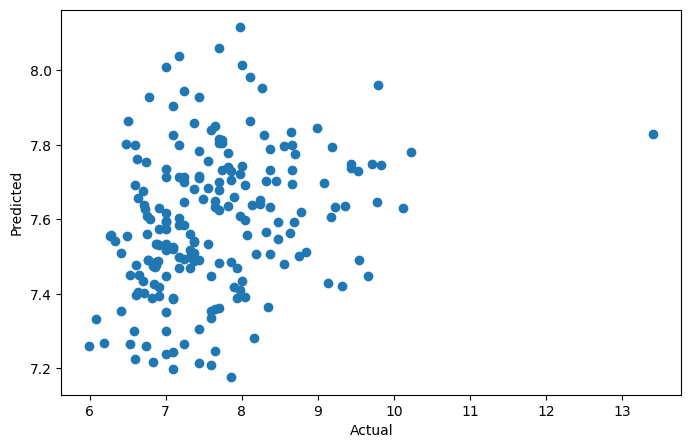

In [27]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()